## More plotting

- Descriptive statistics
- Other statistical plots

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Loading simple text data

Consider a simple text file like `data/data.txt` which is located the
`data` directory on the interface. The file has two columns of data like so:
```
6.930830303506971291e+01 1.950570203348928500e+00
5.076032587226054460e+01 1.968615715715650527e+00
6.285323760945500027e+01 1.343008070563283418e+00
7.068897251770047774e+01 1.602208201785916941e+00
...
```
This can be easily loaded as a numpy array like so:

In [3]:
# Change the path to suit your setup.
data = np.loadtxt('../data/data.txt')

In [4]:
print(len(data))
data[:2]

100


array([[69.30830304,  1.9505702 ],
       [50.76032587,  1.96861572]])

- Look at the documentation for `np.loadtxt`
- Since this has two columns, we can use `unpack=True` to extract the two columns

In [5]:
x, y = np.loadtxt('../data/data.txt', unpack=True)
print(len(x), len(y))
print(x[:2])
print(y[:2])

100 100
[69.30830304 50.76032587]
[1.9505702  1.96861572]


## Mean, std-dev, percentiles, ...

Now let us look at some simple statistics of this data.

In [7]:
np.mean(x)

np.float64(64.37622951831253)

In [8]:
np.mean(y)

np.float64(1.7163359811861927)

In [9]:
# This is the biased estimator.
np.std(x)

np.float64(10.172725902379932)


The biased estimator is:
$$\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$
The unbiased estimator is:
$$\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$$

In [8]:
# The unbiased estimator
np.std(x, ddof=1)

np.float64(10.223974216158723)

In [10]:
np.median(x)

np.float64(65.53904444961248)

### Percentiles

In [11]:
np.percentile(x, 50)

np.float64(65.53904444961248)

In [12]:
# Get multiple in one shot.
np.percentile(x, [25, 50, 75, 90])

array([57.42318383, 65.53904445, 71.19354312, 76.7905247 ])

## Exercise

- For the data above
- Find the percentiles from 0 to 100 (in unit steps)
- Plot them


array type <class 'numpy.ndarray'>, array size 100, 1st element 1, min val 38.62946704063037, max val 90.27864304257214


Text(0.5, 1.0, 'percentile vs value of list x')

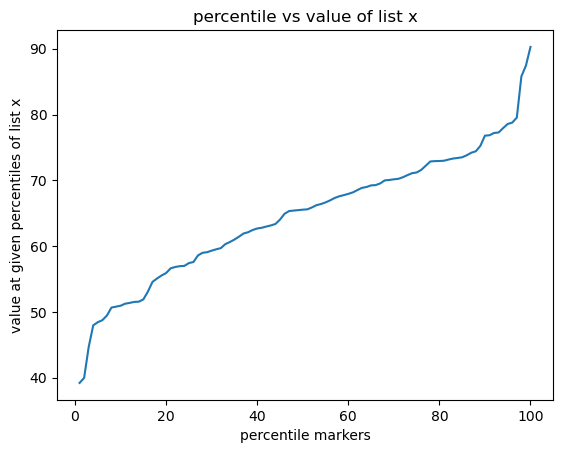

In [15]:
# Solution
index_list = np.array(range(1,101))
print(f'array type {type(index_list)}, array size {len(index_list)}, 1st element {index_list[0]}, min val {x.min()}, max val {x.max()}')
percentile_list = np.percentile(x, index_list)
plt.plot(index_list, percentile_list)
plt.xlabel("percentile markers")
plt.ylabel("value at given percentiles of list x")
plt.title("percentile vs value of list x")

## Scatter plots

Useful to get a sense of the data and their relationship

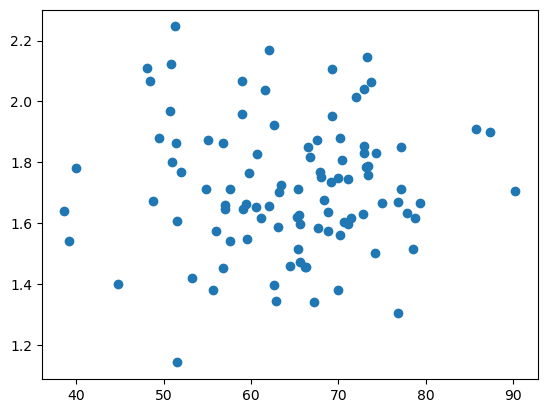

In [16]:
plt.scatter(x, y);

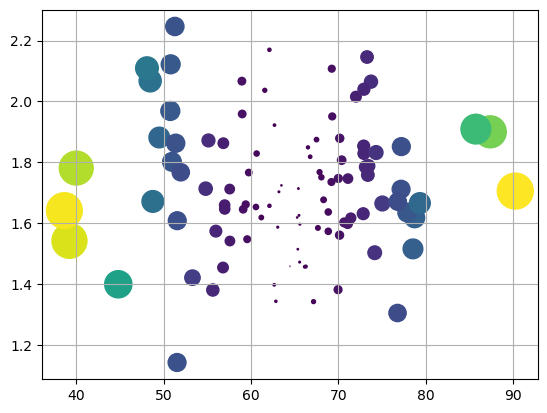

In [17]:
# Can also show size and color.
# We construct a simple scalar to display.
s = (x-np.mean(x))**2 + (y - np.mean(y))**2
plt.scatter(x, y, c=s, s=s)
plt.grid();

## Histograms

Extremely useful to get a sense of the distribution of the data.

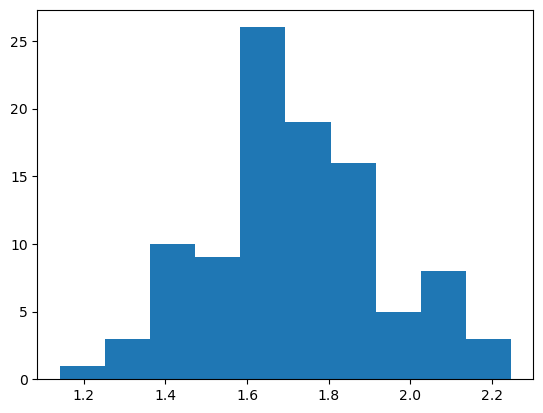

In [18]:
plt.hist(y);

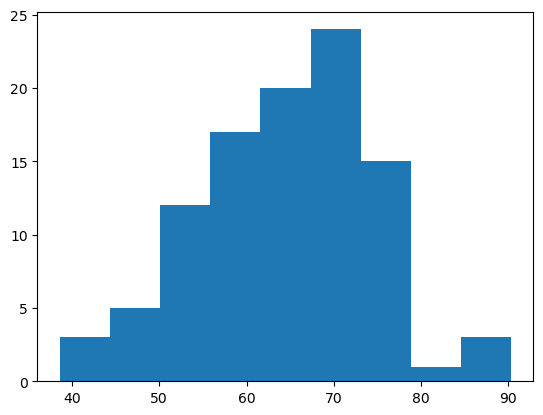

In [19]:
# Warning default bins are just 10, using 'auto' is always a better idea.
plt.hist(x, bins='auto');

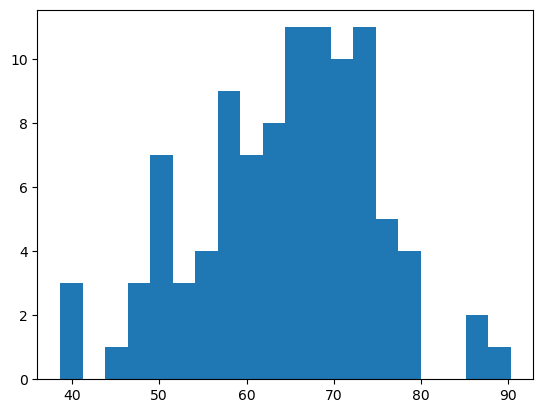

In [20]:
# But if you know better you can specify the number of bins.
plt.hist(x, bins=20);

### Cumulative and relative histograms

- Hope you've seen this in your Statistics course?
- You get an empirical probability density function (PDF) through a histogram!
- But this has to be a relative histogram, i.e. use `density=True`
- A cumulative histogram is an approximation to a Cumulative Distribution Function (CDF)

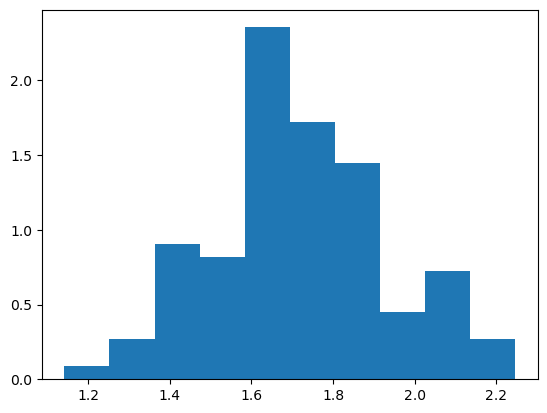

In [21]:
# Relative histogram.
plt.hist(y, bins='auto', density=True);

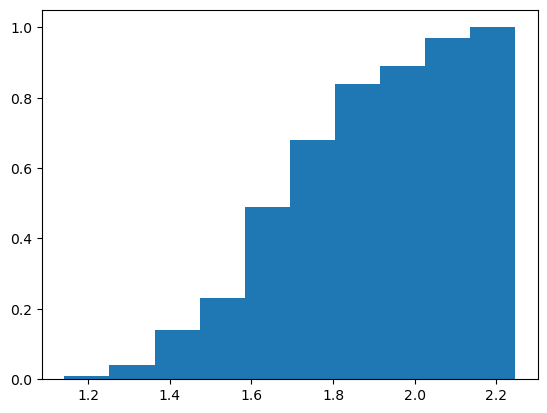

In [23]:
plt.hist(y, bins='auto', cumulative=True, density=True);

## Box-plots

- Powerful plotting utility
- Shows the distribution of the data at a glance
- Typically shows the following:
   - Median, Q1, Q3, IQR
   - Q1 - 1.5*IQR, Q3 + 1.5*IQR


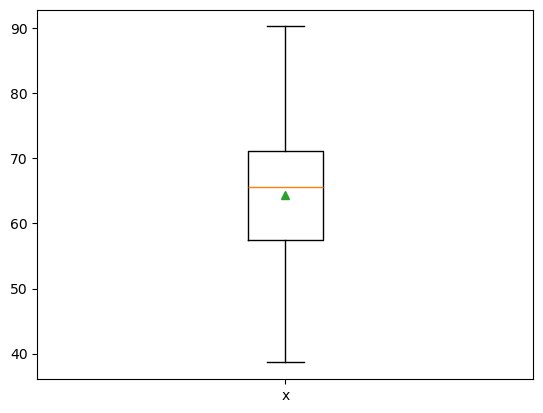

In [24]:
plt.boxplot(x, tick_labels=['x'], showmeans=True);

- Can show multiple boxplots together


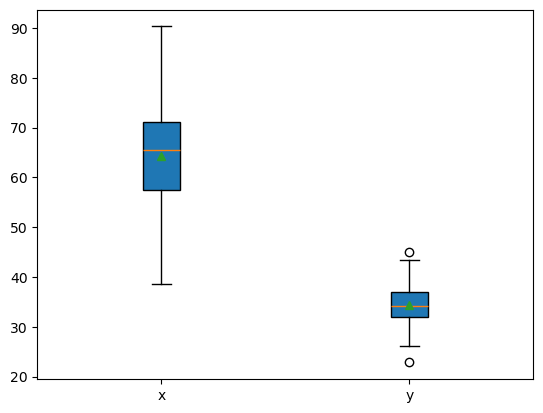

In [6]:
plt.boxplot((x, y*20), tick_labels=['x', 'y'], showmeans=True, patch_artist=True);

## Violin plots!

- Combine PDFs and box plots.


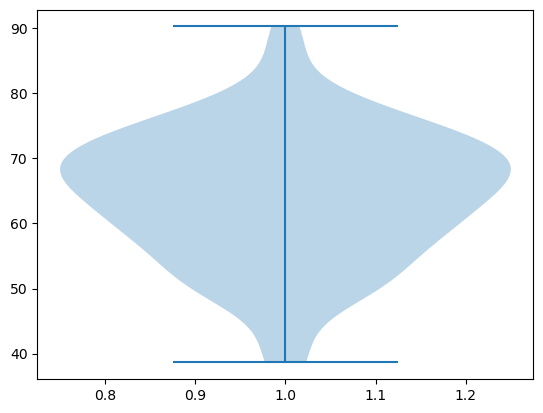

In [7]:
plt.violinplot(x);

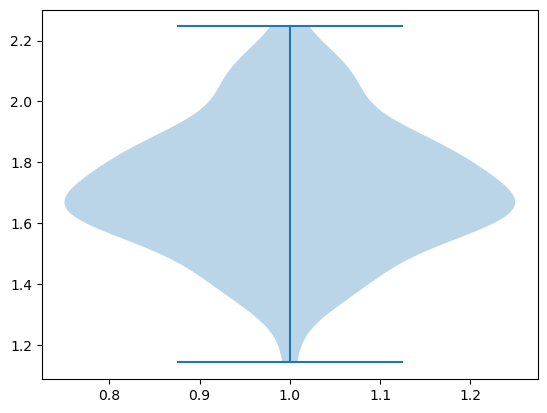

In [8]:
plt.violinplot(y);

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x2adc96cc050>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2adc96cc2d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2adc96cc410>,
 'cbars': <matplotlib.collections.LineCollection at 0x2adc96cc550>}

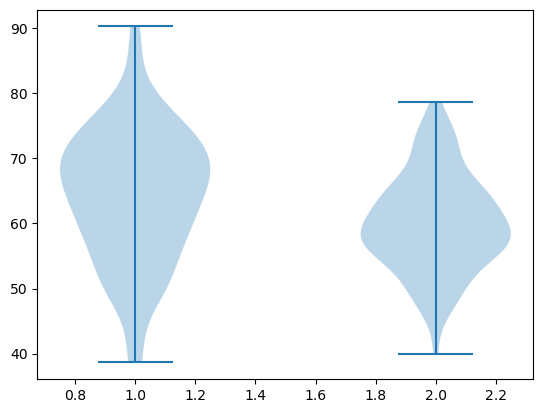

In [11]:
plt.violinplot([x,y*35],)

## Pearson's correlation coefficient

 $$\begin{aligned}
 r = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{(n-1) s_x s_y} \\
 \end{aligned}$$$$r = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y}) }
          {\sqrt {\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$

- $-1 \leq r \leq 1$
- \"Small\" r implies lower correlation

In [35]:
np.corrcoef(x, y)

array([[1.        , 0.00618002],
       [0.00618002, 1.        ]])

## Pie and bar charts.

- In general avoid pie charts, use barcharts/histograms instead.
- But here is how you can do this.

Consider this data:

| **Cancer**  | Lung | Breast | Colon | Prostate | Melanoma | Bladder |
|-------------|------|--------|-------|----------|----------|---------|
| **Numbers** | 42   |  50    |  32   |   55     |  9       |  12     |


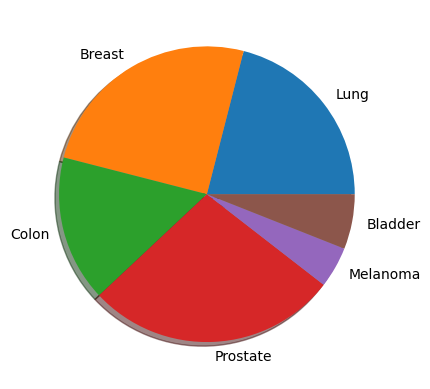

In [36]:
# Solution
cancer = ['Lung', 'Breast', 'Colon', 'Prostate', 'Melanoma', 'Bladder']
numbers = [42, 50, 32, 55, 9, 12]
plt.pie(numbers, labels=cancer, shadow=True);

### Better to use a bar chart


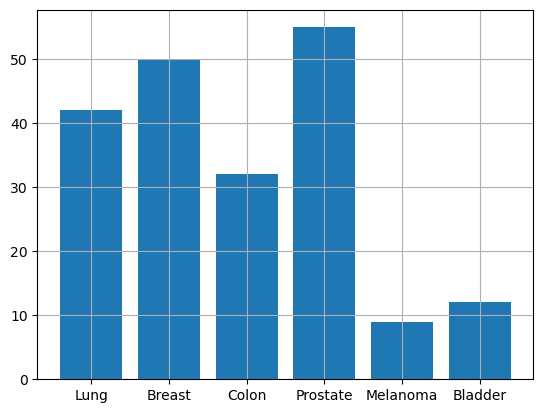

In [37]:
x = np.arange(len(numbers))
plt.bar(x, numbers, tick_label=cancer)
plt.grid();

## Exercise

- Load the data in `'sachin.txt'`, and `'kohli.txt'`
- These have the ODI runs for Sachin tendulkar and Virat Kohli
- They have a single column each
- Load the data using `np.loadtxt`
- Show a histogram (relative) for each.
- Show them together, use the same approach as we did for boxplot.
- Hint: use `plt.legend` to set the legend
- Show the data using a boxplot
- Show the data using a violin plot.

Comment on the player's performance

In [ ]:
# Solution


## Interactivity with widgets

- Jupyter widgets or [IPyWidgets](https://ipywidgets.readthedocs.io/) make
  it very easy to add interactivity to a notebook.
- Already installed on the course website.
- Usually already installed in Anaconda.

Here we learn the bare-minimum to get started. Read the docs to learn more.


In [7]:
from ipywidgets import interact

In [8]:
def sine_plot(k=1, phi=0.0):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x*k + phi)
    plt.plot(x, y)
    plt.grid()

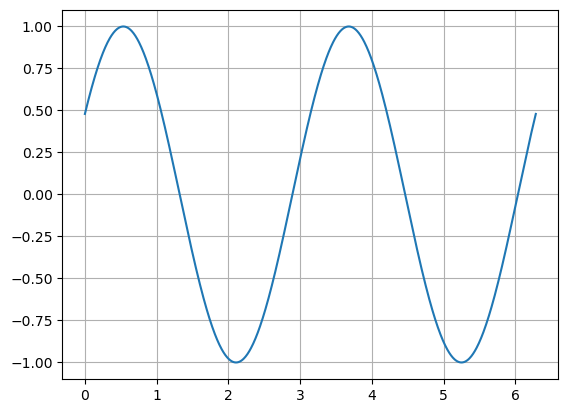

In [9]:
sine_plot(k=2, phi=0.5)

In [10]:
interact(sine_plot, k=(1, 20), phi=(0, 2*np.pi))

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), FloatSlider(value=0.0, description='…

<function __main__.sine_plot(k=1, phi=0.0)>

Can also use the decorator syntax

In [11]:
@interact(k=(1, 20), phi=(0, 2*np.pi))
def sine_plot(k=1, phi=0.0):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x*k + phi)
    plt.plot(x, y)
    plt.grid()

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), FloatSlider(value=0.0, description='…

### Another example


In [12]:
@interact(name=['Krishna', 'Prabhu', 'Hassan'], n=(0, 10), x=(0.0, 1.0))
def f(option=True, hi='Hello', name='Krishna', n=1, x=0.1):
    print(option, hi, name, n, x)

interactive(children=(Checkbox(value=True, description='option'), Text(value='Hello', description='hi'), Dropd…

### Aside: decorators

- Decorators are higher order functions
- Operate on a function and return a function


In [ ]:
# Trivial example
def deco(f):
    return f

In [ ]:
@deco
def g(x):
    pass

# Equivalent to
h = deco(g)

In [ ]:
g(1)

In [ ]:
# More complex example
def deco1(f):
    def _my_f(x):
        print("Hello!")
        return f(x)
    return _my_f

In [ ]:
@deco1
def g(x):
    return x + 1

In [ ]:
g(1)

## Summary

- Statistical quantities: mean, median, std. dev., percentiles
- Statistical plots: scatter plot, histogram, boxplot, bar/pie chart, violin plot
- Correlation coefficient
- Interactivity with `ipywidets` and `interact`
- Decorators